## Information extraction
Information extraction is the task of automatically extracting structured information from unstructured and/or semi-structured machine-readable documents and other electronically represented sources. In most of the cases this activity concerns processing human language texts by means of natural language processing.

# New Section

## SROIE Dataset
For invoice and receipt dataset we are using ICDAR 2019 Robust Reading Challange on Scanned Receipts

```
Reference:
[1]. D. Karatzas, F. Shafait, S. Uchida, M. Iwamura, L. Gomez, S. Robles, J. Mas, D. Fernandez, J. Almazan, L.P. de las Heras: ICDAR 2013 Robust Reading Competition. ICDAR, 2013.

[2]. D. Karatzas, L. Gomez-Bigorda, A. Nicolaou, D. Ghosh , A. Bagdanov, M. Iwamura, J. Matas, L. Neumann, VR. Chandrasekhar, S. Lu, F. Shafait, S. Uchida, E. Valveny: ICDAR 2015 robust reading competition. ICDAR, 2015.

[3]. Everingham, M. and Eslami, S. M. A. and Van Gool, L. and Williams, C. K. I. and Winn, J. and Zisserman, A.: The Pascal Visual Object Classes Challenge: A Retrospective. IJCV, 2015.

[4]. D. Karatzas, L. Rushinol, The Robust Reading Competition Annotation and Evaluation Platform.

```

In [ ]:
!git clone https://github.com/zzzDavid/ICDAR-2019-SROIE.git

Cloning into 'ICDAR-2019-SROIE'...
remote: Enumerating objects: 2386, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 2386 (delta 18), reused 18 (delta 18), pack-reused 2366
Receiving objects: 100% (2386/2386), 278.64 MiB | 29.88 MiB/s, done.
Resolving deltas: 100% (239/239), done.
Checking out files: 100% (1980/1980), done.


In [ ]:
!mkdir boxes_and_transcripts images entities

## Preprocessing the Dataset
We will preprocess Dataset as per PICK-pytorch
<br>https://github.com/wenwenyu/PICK-pytorch/blob/master/data/README.md

In [ ]:
## Script for preprocessing dataset
import os
import pandas
import json
import csv
import shutil

## Input dataset
data_path = "ICDAR-2019-SROIE/data/"
box_path = data_path + "box/"
img_path = data_path + "img/"
key_path = data_path + "key/"

## Output dataset
out_boxes_and_transcripts = "/content/boxes_and_transcripts/"
out_images = "/content/images/"
out_entities  = "/content/entities/"

train_samples_list =  []
for file in os.listdir(data_path + "box/"):
  
  ## Reading csv
  with open(box_path +file, "r") as fp:
    reader = csv.reader(fp, delimiter=",")
    ## arranging dataframe index ,coordinates x1_1,y1_1,x2_1,y2_1,x3_1,y3_1,x4_1,y4_1, transcript
    rows = [[1] + x[:8] + [','.join(x[8:]).strip(',')] for x in reader] 
    df = pandas.DataFrame(rows)
  
  ## including ner label dataframe index ,coordinates x1_1,y1_1,x2_1,y2_1,x3_1,y3_1,x4_1,y4_1, transcript , ner tag
  df[10] = 'other'  
  
  ##saving file into new dataset folder
  jpg = file.replace(".csv",".jpg")
  entities = json.load(open(key_path+file.replace(".csv",".json")))
  for key,value in sorted(entities.items()):
    idx = df[df[9].str.contains('|'.join(map(str.strip, value.split(','))))].index
    df.loc[idx, 10] = key

  shutil.copy(img_path +jpg, out_images)
  with open(out_entities + file.replace(".csv",".txt"),"w") as j:  
    print(json.dumps(entities), file=j)
  
  df.to_csv(out_boxes_and_transcripts+file.replace(".csv",".tsv"),index=False,header=False, quotechar='',escapechar='\\',quoting=csv.QUOTE_NONE, )
  train_samples_list.append(['receipt',file.replace('.csv','')])
train_samples_list = pandas.DataFrame(train_samples_list)
train_samples_list.to_csv("train_samples_list.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [ ]:
from sklearn.model_selection import train_test_split
train_test = pandas.read_csv("train_samples_list.csv",dtype=str)
train, test= train_test_split(train_test,test_size=0.2,random_state = 42)

In [ ]:
!git clone https://github.com/wenwenyu/PICK-pytorch.git

Cloning into 'PICK-pytorch'...
remote: Enumerating objects: 293, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 293 (delta 19), reused 33 (delta 19), pack-reused 256
Receiving objects: 100% (293/293), 9.99 MiB | 13.79 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [ ]:
for index, row in train.iterrows():
  shutil.copy(out_boxes_and_transcripts+str(row[2])+".tsv",'/content/PICK-pytorch/data/data_examples_root/boxes_and_transcripts/')
  shutil.copy(out_images+str(row[2])+".jpg",'/content/PICK-pytorch/data/data_examples_root/images/')
  shutil.copy(out_entities +str(row[2])+".txt", '/content/PICK-pytorch/data/data_examples_root/entities/')

train.drop(['Unnamed: 0'], axis = 1,inplace = True)
train.reset_index(inplace= True)
train.drop(['index'], axis = 1,inplace = True)
train.to_csv("/content/PICK-pytorch/data/data_examples_root/train_samples_list.csv",header = False)

In [ ]:
!mkdir '/content/PICK-pytorch/data/test_data_example/entities/'

In [ ]:
for index, row in test.iterrows():
  shutil.copy(out_boxes_and_transcripts+str(row[2])+".tsv",'/content/PICK-pytorch/data/test_data_example/boxes_and_transcripts/')
  shutil.copy(out_images+str(row[2])+".jpg",'/content/PICK-pytorch/data/test_data_example/images/')
  shutil.copy(out_entities +str(row[2])+".txt", '/content/PICK-pytorch/data/test_data_example/entities/')

test.drop(['Unnamed: 0'], axis = 1,inplace = True)
test.reset_index(inplace= True)
test.drop(['index'], axis = 1,inplace = True)
test.to_csv("/content/PICK-pytorch/data/test_data_example/test_samples_list.csv",header = False)

In [ ]:
## Removing data once it is copied into PICK-pytorch data folder
!rm /content/boxes_and_transcripts/*.tsv
!rm /content/images/*.jpg
!rm /content/entities/*.txt

In [ ]:
%cd PICK-pytorch/

/content/PICK-pytorch


In [ ]:
%%writefile utils/entities_list.py
Entities_list = [
    "company",
    "address",
    "date",
    "total"
]

Overwriting utils/entities_list.py


In [ ]:
## Installing requirements for running PICK-pytorch
!pip install -r requirements.txt
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113


In [ ]:
%pwd
%cd /content/PICK-pytorch
%pwd

/content/PICK-pytorch


'/content/PICK-pytorch'

In [ ]:
#!/bin/bash
!python3 -m torch.distributed.launch --nnode=1 --node_rank=0 --nproc_per_node=1 \
   train.py -c config.json -d 0 --local_world_size 1 --bs=3 --resume /content/PICK-pytorch/saved/models/PICK_Default/test_0619_210929/model_best.pth

   

[2022-06-19 22:02:18,043 - train - INFO] - Distributed GPU training model start...
[2022-06-19 22:02:18,043 - train - INFO] - [Process 7169] Initializing process group with: {'MASTER_ADDR': '127.0.0.1', 'MASTER_PORT': '29500', 'RANK': '0', 'WORLD_SIZE': '1'}
[2022-06-19 22:02:18,044 - train - INFO] - [Process 7169] world_size = 1, rank = 0, backend=nccl
[2022-06-19 22:02:18,050 - train - INFO] - Dataloader instances created. Train datasets: 500 samples Validation datasets: 500 samples.
[2022-06-19 22:02:18,843 - train - INFO] - Model created, trainable parameters: 68567386.
[2022-06-19 22:02:18,844 - train - INFO] - Optimizer and lr_scheduler created.
[2022-06-19 22:02:18,844 - train - INFO] - Max_epochs: 100 Log_per_step: 10 Validation_per_step: 50.
[2022-06-19 22:02:18,844 - train - INFO] - Training start...
[2022-06-19 22:02:18,846 - trainer - INFO] - [Process 7169] world_size = 1, rank = 0, n_gpu/process = 1, device_ids = [0]
[2022-06-19 22:02:21,558 - trainer - INFO] - Loading che

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


save as model or save the current progress into the drive as a checkpoint 

In [ ]:
!cp -r '/content/PICK-pytorch/saved/models/PICK_Default/test_0619_220218' '/content/drive/MyDrive'

make a file for the models version then load it from the drive

In [ ]:
!mkdir /content/PICK-pytorch/saved/models/PICK_DEFAULT/v01
!cp -r '/content/drive/MyDrive/test_0619_220218/model_best.pth' '/content/PICK-pytorch/saved/models/PICK_DEFAULT/v01'
!cp -r '/content/drive/MyDrive/test_0619_220218/config.json' '/content/PICK-pytorch/saved/models/PICK_DEFAULT/v01'


Predict with the trained model

In [ ]:
##creating testing folders
!mkdir /content/test_img /content/test_boxes_and_transcripts

mkdir: cannot create directory ‘/content/test_img’: File exists
mkdir: cannot create directory ‘/content/test_boxes_and_transcripts’: File exists


In [ ]:
## copy one file from test sample
import os
import shutil
data_path = "data/test_data_example/boxes_and_transcripts/"
image_path = "data/test_data_example/images/"

out_img_path = "/content/test_img/"
out_box_path = "/content/test_boxes_and_transcripts/"

for file in os.listdir(data_path)[:10]:
  shutil.copy(data_path+file,out_box_path)
  shutil.copy(image_path+file.replace(".tsv",".jpg"),out_img_path)

In [ ]:
## change model_best.pth path
!python test.py --checkpoint /content/PICK-pytorch/saved/models/PICK_DEFAULT/v01/model_best.pth \
                --boxes_transcripts {out_box_path} \
                --images_path {out_img_path} --output_folder /content/output/ \
                --gpu -1 --batch_size 2

Loading checkpoint: /content/PICK-pytorch/saved/models/PICK_DEFAULT/v01/model_best.pth 
with saved mEF 0.6182 ...
5it [01:29, 17.84s/it]


predictions are in the output folder.

looks like

```
company	ADVANCO COMPANY,co
address	NO 1&3\, JALAN ANGSA DELIMA 12
address	WANGSA LINK\, WANGSA MAJU
address	53300 KUALA LUMPUR
date	23/03/2018
```





                                       text               label
0                                    B.I.G.               other
1                  BEN'S INDEPENDENT GROCER               other
2          BENS INDEPENDENT GROCER SDN. BHD             company
3                                (913144-A)               other
4                                    LOT 6\         JALAN BATAI
5                              PLAZA BATAI\   DAMANSARA HEIGHTS
6                                    50490\        KUALA LUMPUR
7         T: 03-2093 7358 | F: 03-2093 7359               other
8                 (GST REG NO 000243941376)               other
9           TAX INVOICE : BAT02201803120255               other
10                                 12/03/18                date
11                       CASHIER : FATIN SY               other
12                                 20:29:59               other
13                       DOLE PINEAPPLE PCS               other
14                            8809069300

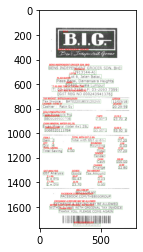

In [ ]:
from numpy.ma.core import size
import pandas as pd

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
from PIL import Image, ImageDraw, ImageFont

head=['a','b','c','d','e','f','g','h','text','label']
path='/content/test_img/060.jpg'
boxes=pd.read_csv('/content/test_boxes_and_transcripts/060.tsv',sep=',',header=None,names=head)
boxes=boxes.reset_index(0)



with Image.open(path) as im:
  

  # bounding box in ploygon format
  font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf", 20)
  for i in range(len(boxes)):
    draw = ImageDraw.Draw(im)
    draw.polygon(boxes.iloc[i]['a':'h'], fill=None, outline='green', width=1)
    x=boxes.iloc[i]['a']+5
    y=boxes.iloc[i]['b']-20
    draw.text((x,y),boxes.iloc[i]['text'], fill=(255, 0, 0),font=font)


im.save("/content/output.png")
plt.imshow(im)

contents="/content/output/012.txt"
print(boxes[['text','label']])
